In [44]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc

def dataframe_to_table(df):
    table = pa.Table.from_pandas(df)
    return table

def table_to_dataframe(table):
    df = table.to_pandas()
    return df

def table_to_parquet(table, parquet_file):
    pq.write_table(table, parquet_file)

def parquet_to_table(parquet_file):
    table = pq.read_table(parquet_file)
    return table


def display_table_schema(table):
    schema = table.schema
    print("Table Schema:")
    for field in schema:
        print(f"{field.name}: {field.type}")


def get_column(table, col_name):
    try:
        selected_table = table.select([col_name])
        column = selected_table.to_pandas()[col_name]
        column.name = col_name

        return column
    except KeyError:
        print(f"La colonne {col_name} n'existe pas dans la table.")
        return None
    
def compute_statistics(table, col_name):
    col = table[col_name]
    count_result = pc.count(col)
    count_distinct_result = pc.count_distinct(col)
    sum_result = pc.sum(col)
    min_result = pc.min(col)
    max_result = pc.max(col)

    # Obtenir les valeurs des résultats
    count_value = count_result.as_py()
    count_distinct_value = count_distinct_result.as_py()
    sum_value = sum_result.as_py()
    min_value = min_result.as_py()
    max_value = max_result.as_py()

    # Afficher les résultats
    print(f"Count: {count_value}")
    print(f"Count Distinct: {count_distinct_value}")
    print(f"Sum: {sum_value}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}")

    res = {
        'Count'  : count_value,
        'Count Distinct' : count_distinct_result,
        'Sum' :  sum_value,
        'Min' : min_value,
        'Max ' : max_value

    }

    return pd.DataFrame([res])

## Question 1

In [45]:
from fonction import *

df_academie = pd.read_csv("academies_virgule.csv")
df_academie

df_villes = pd.read_csv("villes_virgule.csv")
table_villes = dataframe_to_table(df_villes)
parquet_ville_file = 'ville.parquet'
table_to_parquet(table_villes, parquet_ville_file) 

In [46]:
table_academie = dataframe_to_table(df_academie)
table_academie

pyarrow.Table
academie: string
wikipedia: string
vacances: string
dep: string
departement: string
region: string
----
academie: [["Académie de Lyon","Académie d'Amiens","Académie de Clermont-Ferrand","Académie d'Aix-Marseille","Académie d'Aix-Marseille",...,"Académie de Versailles","Académie de la Guadeloupe","Académie de la Martinique","Académie de Guyane","Académie de la Réunion"]]
wikipedia: [["fr:Académie de Lyon (éducation)","fr:Académie d'Amiens (éducation)","fr:Académie de Clermont-Ferrand","fr:Académie d'Aix-Marseille","fr:Académie d'Aix-Marseille",...,"fr:Académie de Versailles (éducation)","fr:Académie de la Guadeloupe","fr:Académie de la Martinique","fr:Académie de la Guyane","fr:Académie de La Réunion"]]
vacances: [["Zone A","Zone B","Zone A","Zone B","Zone B",...,"Zone C",null,null,null,null]]
dep: [["1","2","3","4","5",...,"95","971","972","973","974"]]
departement: [["Ain","Aisne","Allier","Alpes-de-Haute-Provence","Hautes-Alpes",...,"Val-d'Oise","Guadeloupe","Martinique

In [47]:
parquet_file = 'academie.parquet'
table_to_parquet(table_academie, parquet_file)

In [48]:
parquet_to_table('academie.parquet')

pyarrow.Table
academie: string
wikipedia: string
vacances: string
dep: string
departement: string
region: string
----
academie: [["Académie de Lyon","Académie d'Amiens","Académie de Clermont-Ferrand","Académie d'Aix-Marseille","Académie d'Aix-Marseille",...,"Académie de Versailles","Académie de la Guadeloupe","Académie de la Martinique","Académie de Guyane","Académie de la Réunion"]]
wikipedia: [["fr:Académie de Lyon (éducation)","fr:Académie d'Amiens (éducation)","fr:Académie de Clermont-Ferrand","fr:Académie d'Aix-Marseille","fr:Académie d'Aix-Marseille",...,"fr:Académie de Versailles (éducation)","fr:Académie de la Guadeloupe","fr:Académie de la Martinique","fr:Académie de la Guyane","fr:Académie de La Réunion"]]
vacances: [["Zone A","Zone B","Zone A","Zone B","Zone B",...,"Zone C",null,null,null,null]]
dep: [["1","2","3","4","5",...,"95","971","972","973","974"]]
departement: [["Ain","Aisne","Allier","Alpes-de-Haute-Provence","Hautes-Alpes",...,"Val-d'Oise","Guadeloupe","Martinique

## Question 2

In [49]:
schema_table = display_table_schema(table_academie)

Table Schema:
academie: string
wikipedia: string
vacances: string
dep: string
departement: string
region: string


## Question 3

Une fonction qui renvoie la colonne col d'une table donnée en paramètre (fonction column() ou select()).

In [50]:
get_column(table_academie, "dep")

0        1
1        2
2        3
3        4
4        5
      ... 
96      95
97     971
98     972
99     973
100    974
Name: dep, Length: 101, dtype: object

## Question 4

In [51]:
df_villes

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max
0,1,Ozan,1190,618,469,500,93,6.60,4.91667,46.38330,170.0,205.0
1,1,Cormoranche-sur-Saône,1290,1058,903,1000,107,9.85,4.83333,46.23330,168.0,211.0
2,1,Plagne,1130,129,83,100,20,6.20,5.73333,46.18330,560.0,922.0
3,1,Tossiat,1250,1406,1111,1400,138,10.17,5.31667,46.13330,244.0,501.0
4,1,Pouillat,1250,88,58,100,14,6.23,5.43333,46.33330,333.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36695,976,Sada,97640,10195,10195,10195,933,10.92,45.10470,-12.84860,NaN,NaN
36696,976,Tsingoni,97680,10454,10454,10454,300,34.76,45.10700,-12.78970,NaN,NaN
36697,971,Saint-Barthélemy,97133,8938,8938,8938,372,24.00,-62.83330,17.91670,NaN,NaN
36698,971,Saint-Martin,97150,36979,36979,36979,695,53.20,18.09130,-63.08290,NaN,NaN


In [52]:
compute_statistics(table_villes, 'dens')

Count: 36700
Count Distinct: 1663
Sum: 5688355
Min: 0
Max: 26660


In [53]:
compute_statistics(table_villes, 'surf')

Count: 36700
Count Distinct: 5190
Sum: 633345.6599999999
Min: 0.04
Max: 18360.0


## Question 5

Filtrage et tri : des fonctions pour sélectionner les informations sur une ville (e.g. Annecy) et pour sélectionner les informations sur un département (e.g. Haute-Savoie) par ordre alphabétique des villes (fonction filter et sort).

In [54]:
def filtrer_par_ville(dataset, ville):
    result = dataset[dataset['nom'] == ville]
    return result



def filtrer_par_departement_trier_par_ville(dataset, departement):
    filtered_data = dataset[dataset['dep'] == departement]
    sorted_data = filtered_data.sort_values(by='nom')
    return sorted_data



In [55]:
df_ville=pd.read_csv('villes_virgule.csv')
df_academies=pd.read_csv('academies_virgule.csv')
tf=filtrer_par_ville(df_ville,'Annecy')

tff=filtrer_par_departement_trier_par_ville(df_ville,'74')




In [56]:
tf

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max
30170,74,Annecy,74000,50379,50324,50100,3690,13.65,6.11667,45.9,418.0,926.0


In [57]:
tff

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max
30171,74,Abondance,74360,1342,1297,1300,22,58.84,6.73333,46.2833,840.0,2420.0
30422,74,Alby-sur-Chéran,74540,2012,1631,2000,306,6.56,6.02084,45.8167,360.0,606.0
30227,74,Alex,74290,985,791,1000,57,17.02,6.23333,45.8833,516.0,1852.0
30269,74,Allinges,74200,3982,3022,3800,265,15.01,6.46667,46.3333,438.0,750.0
30249,74,Allonzier-la-Caille,74350,1637,1080,1500,170,9.62,6.11667,46.0000,471.0,882.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30158,74,Épagny,74330,3899,3233,3800,575,6.77,6.10000,45.9333,440.0,775.0
30401,74,Étercy,74150,698,630,700,153,4.55,6.00000,45.8833,337.0,593.0
30291,74,Étrembières,74100,1887,1429,1800,347,5.43,6.23333,46.1833,393.0,860.0
30216,74,Évian-les-Bains,74500,8142,7278,8100,1897,4.29,6.58333,46.3833,372.0,772.0


## Question 6

### Calcul nombre moyen d'habitant en 2012

In [58]:
df_hab_2012 = df_villes['nb_hab_2012']
df_hab_2012.mean()

1751.080272479564

### Calcul du nombre moyen d'habitants par département

In [59]:
df = df_villes.groupby('dep')['nb_hab_2012'].mean()
df.head()

dep
1      1388.305489
10      696.304850
11      796.575342
12      905.263158
13    16515.966387
Name: nb_hab_2012, dtype: float64

### afficher le résultat pour le département 74

In [60]:
df_villes[df_villes['dep'] == '74']

,dep,nom,cp,nb_hab_2010,nb_hab_1999,nb_hab_2012,dens,surf,long,lat,alt_min,alt_max
30143,74,Andilly,74350,778,594,800,128,6.07,6.06667,46.0500,577.0,857.0
30144,74,Minzier,74270,862,498,800,98,8.79,5.98333,46.0500,456.0,750.0
30145,74,Saint-Paul-en-Chablais,74500,2172,1700,2100,150,14.45,6.63333,46.3833,698.0,1268.0
30146,74,Hauteville-sur-Fier,74150,825,685,800,168,4.90,5.98333,45.9000,320.0,524.0
30147,74,Vanzy,74270,303,242,300,54,5.57,5.88333,46.0500,287.0,537.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30432,74,Évires,74570,1294,1062,1300,66,19.49,6.23333,46.0333,593.0,955.0
30433,74,Chens-sur-Léman,74140,1893,1274,1700,174,10.87,6.26667,46.3333,372.0,439.0
30434,74,Quintal,74600,1198,882,1100,131,9.13,6.08333,45.8333,585.0,1533.0
30435,74,Ambilly,74100,5890,5811,5900,4712,1.25,6.22417,46.1950,410.0,434.0


In [61]:
mask = pc.equal(table_villes['dep'], pa.scalar('74'))
table_villes.filter(mask)

pyarrow.Table
dep: string
nom: string
cp: string
nb_hab_2010: int64
nb_hab_1999: int64
nb_hab_2012: int64
dens: int64
surf: double
long: double
lat: double
alt_min: double
alt_max: double
----
dep: [["74","74","74","74","74",...,"74","74","74","74","74"]]
nom: [["Andilly","Minzier","Saint-Paul-en-Chablais","Hauteville-sur-Fier","Vanzy",...,"Évires","Chens-sur-Léman","Quintal","Ambilly","Talloires"]]
cp: [["74350","74270","74500","74150","74270",...,"74570","74140","74600","74100","74290"]]
nb_hab_2010: [[778,862,2172,825,303,...,1294,1893,1198,5890,1690]]
nb_hab_1999: [[594,498,1700,685,242,...,1062,1274,882,5811,1447]]
nb_hab_2012: [[800,800,2100,800,300,...,1300,1700,1100,5900,1600]]
dens: [[128,98,150,168,54,...,66,174,131,4712,81]]
surf: [[6.07,8.79,14.45,4.9,5.57,...,19.49,10.87,9.13,1.25,20.69]]
long: [[6.06667,5.98333,6.63333,5.98333,5.88333,...,6.23333,6.26667,6.08333,6.22417,6.21667]]
lat: [[46.05,46.05,46.3833,45.9,46.05,...,46.0333,46.3333,45.8333,46.195,45.85]]
...

## Question 7

Opérations ensemblistes jointures : afficher les zones de vacances des villes ; les villes de la zone de vacances A ; les départements des zones de vacances A et B ; le nombre de villes par académie ;

In [62]:
def join(df1,df2,id):
    return(pd.merge(df1,df2, on=id))
df_join_ville_academies=join(df_ville,df_academies,'dep')


In [63]:
def display_ville_zone(df):

    result = df[['nom', 'vacances']]
    print(result)


def display_zone_ville(df,zone):
    
    result = df[df['vacances'] == zone]
    return result[['nom','vacances']]



### filtrage par zone de vacance 

In [64]:
display_zone_ville(df_join_ville_academies,"Zone A") 

,nom,vacances
0,Ozan,Zone A
1,Cormoranche-sur-Saône,Zone A
2,Plagne,Zone A
3,Tossiat,Zone A
4,Pouillat,Zone A
...,...,...
35406,Chavannes-les-Grands,Zone A
35407,Lacollonge,Zone A
35408,Bretagne,Zone A
35409,Lepuix-Neuf,Zone A


In [65]:
def afficher_departements_par_zones(dataset, zones):
    # Charger le dataset s'il n'est pas déjà en DataFrame pandas
    if not isinstance(dataset, pd.DataFrame):
        dataset = pd.read_parquet(dataset)  # Assurez-vous de remplacer le format de lecture si nécessaire

    # Filtrer les données en fonction des zones de vacances spécifiques
    try:
        result = dataset[dataset['vacances'].isin(zones)][['vacances', 'dep']].drop_duplicates()
        print(result)
    except KeyError:
        print("Les colonnes nécessaires n'existent pas dans le dataset.")  
afficher_departements_par_zones(df_join_ville_academies,['Zone A','Zone B'])


      vacances dep
0       Zone A   1
419     Zone B   2
1235    Zone A   3
1555    Zone B   4
1755    Zone B   5
...        ...  ..
33857   Zone A  86
34138   Zone A  87
34339   Zone B  88
34854   Zone A  89
35309   Zone A  90

[72 rows x 2 columns]


In [66]:
def number_ville_accademie(df):
    result = df.groupby('academie')['nom'].count().reset_index()
    result.columns = ['academie', 'nombre_villes']
    return(result)


nbr_ville_aca=number_ville_accademie(df_join_ville_academies)
nbr_ville_aca

,academie,nombre_villes
0,Académie d'Aix-Marseille,647
1,Académie d'Amiens,2291
2,Académie d'Orléans-Tours,1842
3,Académie de Besançon,1785
4,Académie de Bordeaux,2296
5,Académie de Caen,1812
6,Académie de Clermont-Ferrand,1310
7,Académie de Corse,360
8,Académie de Créteil,601
9,Académie de Dijon,2046


## Question 8

Distribution du nombre de ville par académie

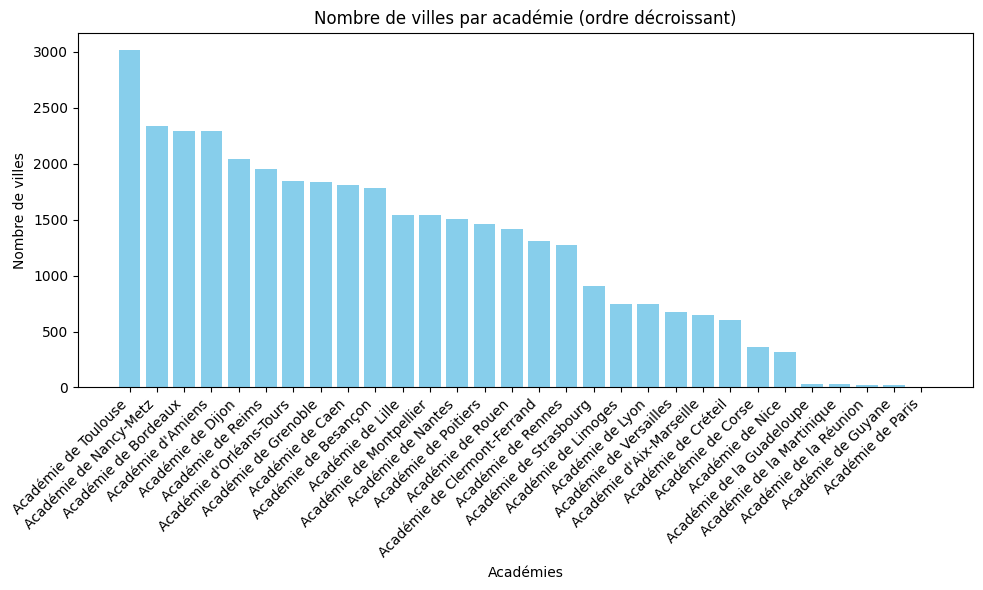

In [67]:
import matplotlib.pyplot as plt

academies = nbr_ville_aca["academie"]
nombre_villes = nbr_ville_aca["nombre_villes"]

sorted_indices = sorted(range(len(nombre_villes)), key=lambda i: nombre_villes[i], reverse=True)
academies_sorted = [academies[i] for i in sorted_indices]
nombre_villes_sorted = [nombre_villes[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(academies_sorted, nombre_villes_sorted, color='skyblue')
plt.xlabel('Académies')
plt.ylabel('Nombre de villes')
plt.title('Nombre de villes par académie (ordre décroissant)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

